In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [3]:
# import the data
path_to_train = 'MNIST_training_set.npy'
path_to_test = 'MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)

# get the training set and testing set
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')
X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

In [4]:
# check shapes
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((2000, 256), (2000,), (500, 256), (500,))

**Task 1**

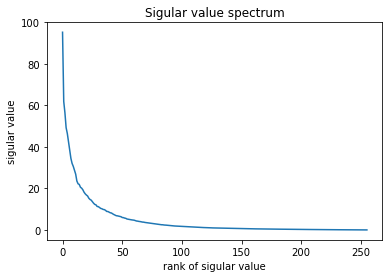

In [5]:
#X_train = StandardScaler().fit_transform(X_train) # normalize the data
pca = PCA()
pca.fit(X_train)
plt.xlabel("rank of sigular value")
plt.ylabel("sigular value")
plt.title("Sigular value spectrum")
plt.plot(pca.singular_values_)
plt.savefig("fig1.jpg");
plt.show();


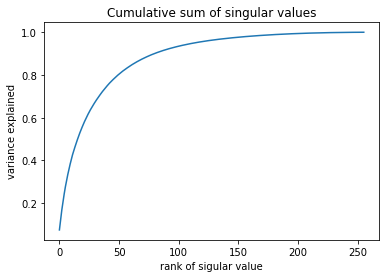

In [6]:
plt.plot(np.cumsum(pca.singular_values_)/np.sum(pca.singular_values_));
plt.xlabel("rank of sigular value")
plt.ylabel("variance explained")
plt.title("Cumulative sum of singular values")
plt.savefig("fig2.jpg")
plt.show()

The above plot suggests that low rank sigular value has much less effect in explaining the variantions in the dataset

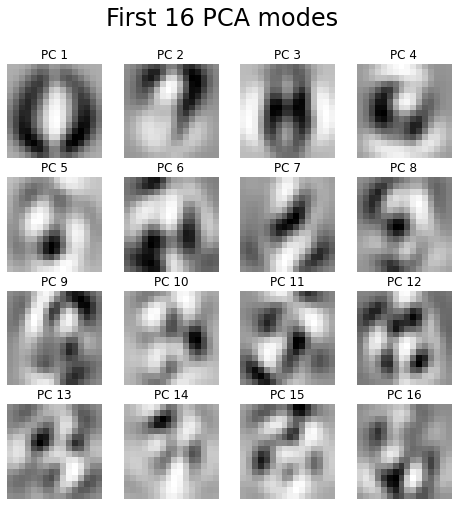

In [7]:
def plot_PCA(X,N,title):
    fig, ax = plt.subplots(N, N, figsize=(8,8))
    for i in range(N):
        for j in range(N):
            ax[i, j].imshow(X[(4 * i) + j,:].reshape((16, 16)), cmap="Greys") # Plot component
            ax[i, j].set_title('PC ' + str((4 * i) + j + 1), fontsize=12)
            ax[i,j].axis("off")
    
    fig.suptitle(title,fontsize = 24)
    plt.savefig("fig3.jpg")
plot_PCA(pca.components_, 4, "First 16 PCA modes")

**Task 2**

In [8]:
#  Frobenius norm
sigular_sum = np.cumsum(pca.singular_values_**2)**0.5/np.sum(pca.singular_values_**2)**0.5
np.where(sigular_sum>=0.6)[0].min()+1,np.where(sigular_sum>=0.8)[0].min()+1,np.where(sigular_sum>=0.9)[0].min()+1

(3, 7, 14)

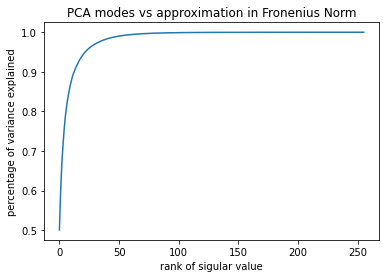

In [9]:
plt.plot(np.cumsum(pca.singular_values_**2)**0.5/np.sum(pca.singular_values_**2)**0.5);
plt.xlabel("rank of sigular value");
plt.ylabel("percentage of variance explained");
plt.title("PCA modes vs approximation in Fronenius Norm");
plt.savefig("fig4.jpg");
plt.show()

**visualize the original data and low rank approximation of data**

In [10]:
# helper function provided
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)
    plt.savefig("fig8.jpg")

#plot_digits(X_train, 8, "First 64 Training Features" )

In [11]:
# low rank approximation
def reconstruct(X, N):
  pca = PCA(N)
  pca.fit(X)
  X_approx = pca.inverse_transform(pca.transform(X))

  return X_approx

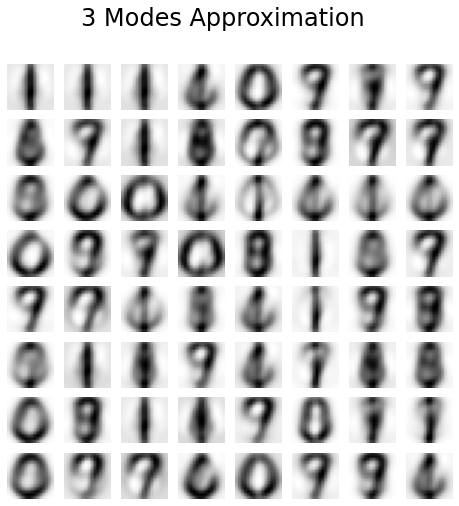

In [12]:
plot_digits(reconstruct(X_train,3), 8, "3 Modes Approximation" )

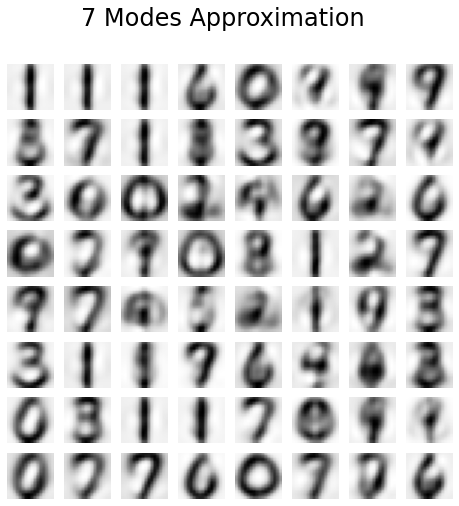

In [13]:
plot_digits(reconstruct(X_train,7), 8, "7 Modes Approximation" )

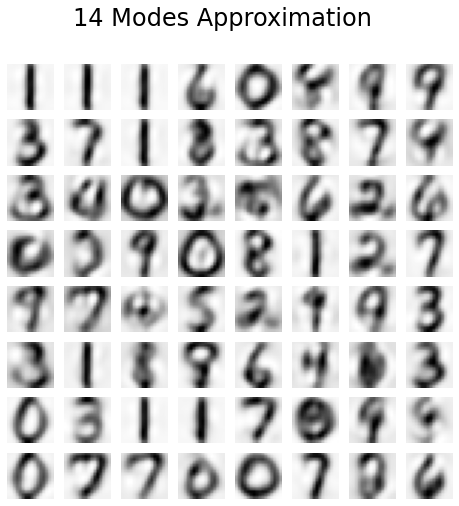

In [14]:
plot_digits(reconstruct(X_train,14), 8, "14 Modes Approximation" )

**Task 3**

In [15]:
def extractTrain(X,Y,digit1,digit2):
    idx = np.hstack((np.where(Y_train == digit1)[0],np.where(Y_train == digit2)[0]))
    return X[idx],np.where(Y[idx]>digit1,-1,1)

def extractTest(X,Y,digit1,digit2):
    idx = np.hstack((np.where(Y_test == digit1)[0],np.where(Y_test == digit2)[0]))
    return X[idx],np.where(Y[idx]>digit1,-1,1)

In [27]:
# delete later
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')
X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

**pair(1,8)**

In [32]:
from sklearn.metrics import mean_squared_error
pca = PCA(16)
pca.fit(X_train)

X18_train,Y18_train = extractTrain(X_train,Y_train,1,8)
X18_test,Y18_test = extractTest(X_test,Y_test,1,8)

A_train = pca.transform(X18_train)
A_test = pca.transform(X18_test)

classifier = RidgeCV(alphas=2**np.linspace(-4, 20, 1000), scoring='neg_mean_squared_error')
classifier.fit(A_train, Y18_train)

b_train_predict = classifier.predict(A_train)
b_test_predict = classifier.predict(A_test)

print("best alpha", classifier.alpha_)
print("MSE_train", mean_squared_error(Y18_train, b_train_predict))
print("MSE_test", mean_squared_error(Y18_test, b_test_predict))

best alpha 9.871732512464824
MSE_train 0.07543155810317873
MSE_test 0.08258178732178519


**pair(3,8)**

In [33]:
from sklearn.metrics import mean_squared_error
pca = PCA(16)
pca.fit(X_train)

X18_train,Y18_train = extractTrain(X_train,Y_train,3,8)
X18_test,Y18_test = extractTest(X_test,Y_test,3,8)

A_train = pca.transform(X18_train)
A_test = pca.transform(X18_test)

classifier = RidgeCV(alphas=2**np.linspace(-4, 20, 1000), scoring='neg_mean_squared_error')
classifier.fit(A_train, Y18_train)

b_train_predict = classifier.predict(A_train)
b_test_predict = classifier.predict(A_test)

print("best alpha", classifier.alpha_)
print("MSE_train", mean_squared_error(Y18_train, b_train_predict))
print("MSE_test", mean_squared_error(Y18_test, b_test_predict))

best alpha 14.72177661026537
MSE_train 0.1819745999439108
MSE_test 0.2600139238286132


**pair(2,7)**

In [34]:
from sklearn.metrics import mean_squared_error
pca = PCA(16)
pca.fit(X_train)

X18_train,Y18_train = extractTrain(X_train,Y_train,2,7)
X18_test,Y18_test = extractTest(X_test,Y_test,2,7)

A_train = pca.transform(X18_train)
A_test = pca.transform(X18_test)

classifier = RidgeCV(alphas=2**np.linspace(-4, 20, 1000), scoring='neg_mean_squared_error')
classifier.fit(A_train, Y18_train)

b_train_predict = classifier.predict(A_train)
b_test_predict = classifier.predict(A_test)

print("best alpha", classifier.alpha_)
print("MSE_train", mean_squared_error(Y18_train, b_train_predict))
print("MSE_test", mean_squared_error(Y18_test, b_test_predict))

best alpha 7.56279188466691
MSE_train 0.0924394167476274
MSE_test 0.13248002588878094


In [24]:
pca = PCA(16)
pca.fit(X_train)

X18_train,Y18_train = extractTrain(X_train,Y_train,1,8)
X18_test,Y18_test = extractTest(X_test,Y_test,1,8)

# transform the data
X_18_train = pca.transform(X_train)
X_18_test = pca.transform(X_test)

In [25]:
def Ridge_Regression(X_train,Y_train,X_test,Y_test):
    classifier = RidgeCV(alphas=2**np.linspace(-4, 20, 1000))
    classifier.fit(X_train, Y_train)
    
    Y_hat_train = classifier.predict(X_train)

    Y_hat_test = classifier.predict(X_test)
    
    print("best alpha ",classifier.alpha_)
    print("training mse ",np.sum((Y_hat_train - Y_train)**2)/len(Y_train))
    print("testing mse ",np.sum((Y_hat_test - Y_test)**2)/len(Y_test))

In [26]:
Ridge_Regression(X18_train,Y18_train,X18_test,Y18_test)

best alpha  5.698216790521174
training mse  0.040244214889716357
testing mse  0.06941750027012006


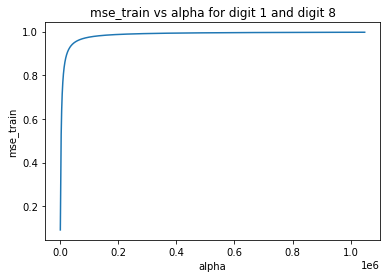

In [331]:
plt.xlabel("alpha")
plt.ylabel("mse_train")
plt.title("mse_train vs alpha for digit 1 and digit 8")
plt.plot(alphas,mse_train);
plt.savefig("fig9.jpg")
plt.show()

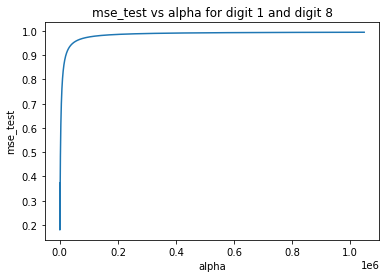

In [332]:
plt.xlabel("alpha")
plt.ylabel("mse_test")
plt.title("mse_test vs alpha for digit 1 and digit 8")
plt.plot(alphas,mse_test);
plt.savefig("fig10.jpg")
plt.show()

**Repeat for pairs (3,8)**

In [335]:
X38_train,Y38_train = extractTrain(X_train,Y_train,3,8)
X38_test,Y38_test = extractTest(X_test,Y_test,3,8)

Ridge_Regression(X38_train,Y38_train,X38_test,Y38_test)

best alpha  14.72177661026537
training mse  0.18197266198964124
testing mse  0.5455369151006304


In [308]:
mse_train = []
mse_test = []
alphas=2**np.linspace(-4, 20, 1000)

def rid(X_train,Y_train,X_test,Y_test):
    for a in alphas:
        
        clf = Ridge(alpha = a)
        clf.fit(X_train,Y_train)
    
        Y_hat_train = clf.predict(X_train)
        Y_hat_test = clf.predict(X_test)
    
        mse1 = np.sum((Y_hat_train - Y_train)**2)/len(Y_train)
        mse2 = np.sum((Y_hat_test - Y_test)**2)/len(Y_test)
        
        mse_train.append(mse1)
        mse_test.append(mse2)
        
rid(X38_train,Y38_train,X38_test,Y38_test)

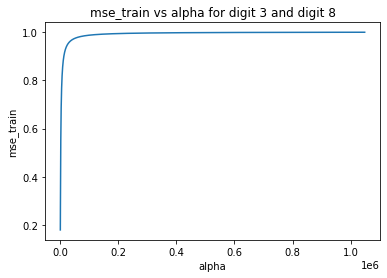

In [309]:
plt.xlabel("alpha")
plt.ylabel("mse_train")
plt.title("mse_train vs alpha for digit 3 and digit 8")
plt.plot(alphas,mse_train);
plt.savefig("fig11.jpg")
plt.show()

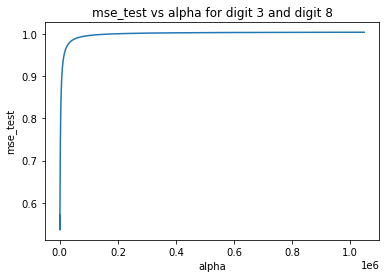

In [310]:
plt.xlabel("alpha")
plt.ylabel("mse_test")
plt.title("mse_test vs alpha for digit 3 and digit 8")
plt.plot(alphas,mse_test);
plt.savefig("fig12.jpg")
plt.show()

**Repeat for pair(2,7)**

In [336]:
X27_train,Y27_train = extractTrain(X_train,Y_train,2,7)
X27_test,Y27_test = extractTest(X_test,Y_test,2,7)

Ridge_Regression(X27_train,Y27_train,X27_test,Y27_test)

best alpha  7.56279188466691
training mse  0.09243699601354917
testing mse  0.31985125159182504


In [312]:
mse_train = []
mse_test = []
alphas=2**np.linspace(-4, 20, 1000)

def rid(X_train,Y_train,X_test,Y_test):
    for a in alphas:
        
        clf = Ridge(alpha = a)
        clf.fit(X_train,Y_train)
    
        Y_hat_train = clf.predict(X_train)
        Y_hat_test = clf.predict(X_test)
    
        mse1 = np.sum((Y_hat_train - Y_train)**2)/len(Y_train)
        mse2 = np.sum((Y_hat_test - Y_test)**2)/len(Y_test)
        
        mse_train.append(mse1)
        mse_test.append(mse2)
        
rid(X27_train,Y27_train,X27_test,Y27_test)

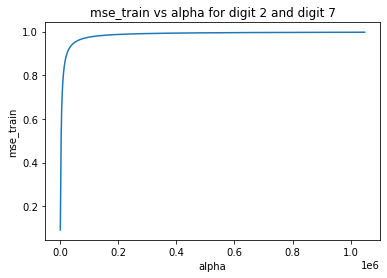

In [313]:
plt.xlabel("alpha")
plt.ylabel("mse_train")
plt.title("mse_train vs alpha for digit 2 and digit 7")
plt.plot(alphas,mse_train);
plt.savefig("fig13.jpg")
plt.show()

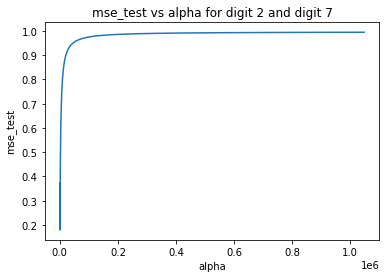

In [314]:
plt.xlabel("alpha")
plt.ylabel("mse_test")
plt.title("mse_test vs alpha for digit 2 and digit 7")
plt.plot(alphas,mse_test);
plt.savefig("fig13.jpg")
plt.show()